# Project 2 - WRITEUP

## 1. DH PARAMETERS TABLE

In [832]:
from sympy import symbols, cos, sin, pi, simplify, sqrt, atan2
from sympy.matrices import Matrix
import numpy as np
from numpy import array
import tf
from IPython.display import Image

## Create symbols for joint variables
q1, q2, q3, q4, q5, q6, q7 = symbols('q1:8') # theta_i
d1, d2, d3, d4, d5, d6, d7 = symbols('d1:8')
a0, a1, a2, a3, a4, a5, a6 = symbols('a0:7')
alpha0, alpha1, alpha2, alpha3, alpha4, alpha5, alpha6 = symbols('alpha0:7')


### KUKA KR210 ###
s = {
    alpha0: 0,     a0:    0,          d1: 0.75,
    
    alpha1: -pi/2, a1:    0.35,       d2: 0,       q2: (q2 - pi/2),
    
    alpha2: 0,     a2:    1.25,       d3: 0,
    
    alpha3: -pi/2, a3:  -0.054,       d4: 1.50,
    
    alpha4: pi/2,  a4:       0,       d5: 0,
    
    alpha5: -pi/2, a5:       0,       d6: 0,
    
    alpha6: 0,     a6:       0,       d7: 0.303,    q7:0
    
}


Based on URDF file and Project 2 video lectures, we can come up with the above DH table. Also, we apply the right-hand rule to determine direction of all the coordinates. 


Because the joint locations are not exactly the same as the chosen origin of the frame coordinate, the diagram below is based purely on the DH table above information and assume that the joint and origin of the frame will be the same.

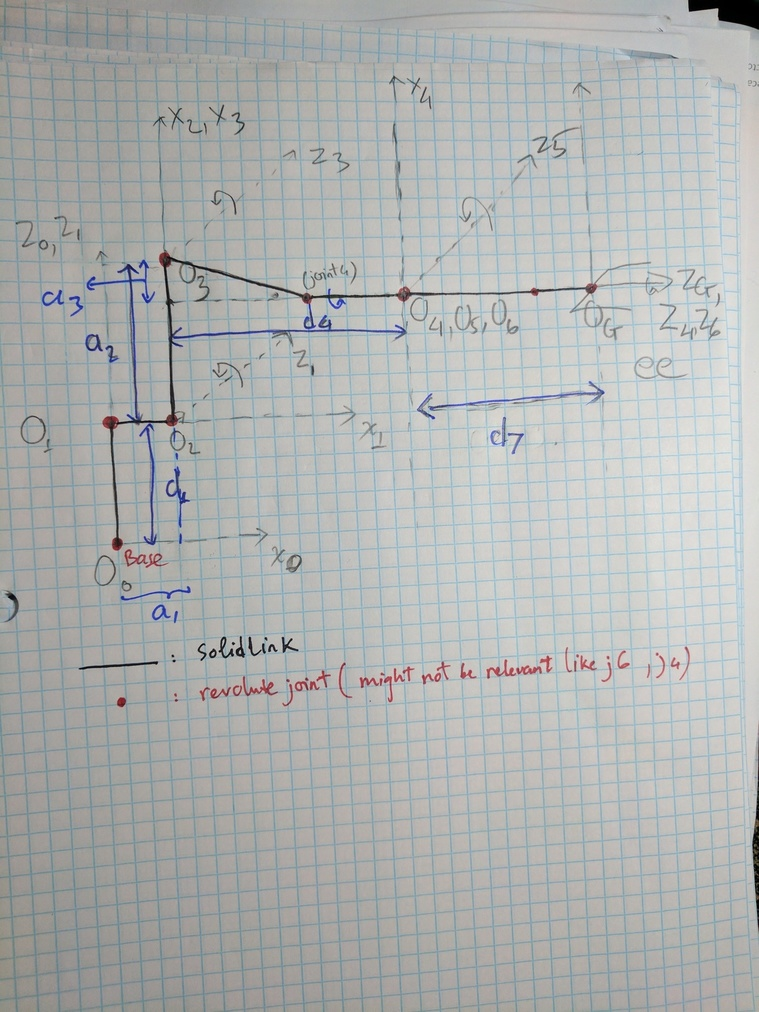

In [837]:
Image(filename='pic/DH_diagram.jpg') 

## 2 . TRANSFORMATION MATRICES

### Homogeneous Tranformation Matrices Between Joints

In order to understand the Forward Kinematic of the project, we construct all the homogeneous transformation matrices between parent and child joints as well as from base to any specific joint as below:

Also, the generic form of the homogeneous transform from one frame to another is given in lesson 2 section 12. We just have to plugin different angle values q1..q7 to arrive at the result.

In [816]:
### HOMOGENEOUS TRANSFORMATION BETWEEN NEIGHBOR FRAME
T0_1 = Matrix([[cos(q1),                        -sin(q1),             0,                  a0],
               [sin(q1)*cos(alpha0), cos(q1)*cos(alpha0),  -sin(alpha0),     -sin(alpha0)*d1],
               [sin(q1)*sin(alpha0), cos(q1)*sin(alpha0),   cos(alpha0),      cos(alpha0)*d1],
               [                  0,                    0,            0,     1]])
T0_1 = T0_1.subs(s)

## T1_2
T1_2 = Matrix([[cos(q2),                        -sin(q2),             0,                  a1],
               [sin(q2)*cos(alpha1), cos(q2)*cos(alpha1),  -sin(alpha1),     -sin(alpha1)*d2],
               [sin(q2)*sin(alpha1), cos(q2)*sin(alpha1),   cos(alpha1),      cos(alpha1)*d2],
               [                  0,                    0,            0,     1]])
T1_2 = T1_2.subs(s)

## T2_3
T2_3 = Matrix([[cos(q3),                        -sin(q3),             0,                  a2],
               [sin(q3)*cos(alpha2), cos(q3)*cos(alpha2),  -sin(alpha2),     -sin(alpha2)*d3],
               [sin(q3)*sin(alpha2), cos(q3)*sin(alpha2),   cos(alpha2),      cos(alpha2)*d3],
               [                  0,                    0,            0,     1]])
T2_3 = T2_3.subs(s)


## T3_4
T3_4 = Matrix([[cos(q4),                        -sin(q4),             0,                  a3],
               [sin(q4)*cos(alpha3), cos(q4)*cos(alpha3),  -sin(alpha3),     -sin(alpha3)*d4],
               [sin(q4)*sin(alpha3), cos(q4)*sin(alpha3),   cos(alpha3),      cos(alpha3)*d4],
               [                  0,                    0,            0,     1]])
T3_4 = T3_4.subs(s)


## T4_5
T4_5 = Matrix([[cos(q5),                        -sin(q5),             0,                  a4],
               [sin(q5)*cos(alpha4), cos(q5)*cos(alpha4),  -sin(alpha4),     -sin(alpha4)*d5],
               [sin(q5)*sin(alpha4), cos(q5)*sin(alpha4),   cos(alpha4),      cos(alpha4)*d5],
               [                  0,                    0,            0,     1]])
T4_5 = T4_5.subs(s)



## T5_6
T5_6 = Matrix([[cos(q6),                        -sin(q6),             0,                  a5],
               [sin(q6)*cos(alpha5), cos(q6)*cos(alpha5),  -sin(alpha5),     -sin(alpha5)*d6],
               [sin(q6)*sin(alpha5), cos(q6)*sin(alpha5),   cos(alpha5),      cos(alpha5)*d6],
               [                  0,                    0,            0,     1]])
T5_6 = T5_6.subs(s)

## T6_G
T6_G = Matrix([[            cos(q7),            -sin(q7),             0,                  a6],
               [sin(q7)*cos(alpha6), cos(q7)*cos(alpha6),  -sin(alpha6),     -sin(alpha6)*d7],
               [sin(q7)*sin(alpha6), cos(q7)*sin(alpha6),   cos(alpha6),      cos(alpha6)*d7],
               [                  0,                    0,            0,     1]])
T6_G = T6_G.subs(s)

### Verify that the matrix is correct using Forward Kinematics

In [817]:
## COMPOSITION OF HOMOGENEOUS TRANSFORMS

T0_2 = simplify(T0_1 * T1_2) # base_link to link_2
T0_3 = simplify(T0_2 * T2_3) # base_link to link_3
T0_4 = simplify(T0_3 * T3_4) # base_link to link_4
T0_5 = simplify(T0_4 * T4_5) # base_link to link_5
T0_6 = simplify(T0_5 * T5_6) # base_link to link_6
T0_G = simplify(T0_6 * T6_G) # base_link to gripper_link


### Evaluate Transformation matrices and check with the simulation values to verify that our matrices are correct 

In [818]:
sub_dict_center = {q1:0, q2:-0, q3:0, q4:0, q5:0, q6:0}
print("T0_1 = ", T0_1.evalf(subs=sub_dict_center))
print("\n")
print("T0_2 = ", T0_2.evalf(subs=sub_dict_center))
print("\n")
print("T0_3 = ", T0_3.evalf(subs=sub_dict_center))
print("\n")
print("T0_4 = ", T0_4.evalf(subs=sub_dict_center))
print("\n\n")
print("T0_5 = ", T0_5.evalf(subs=sub_dict_center))
print("\n\n")
print("T0_6 = ", T0_6.evalf(subs=sub_dict_center))
print("\n\n")
print("T0_G = ", T0_G.evalf(subs=sub_dict_center))
print("\n\n")

('T0_1 = ', Matrix([
[1.0,   0,   0,    0],
[  0, 1.0,   0,    0],
[  0,   0, 1.0, 0.75],
[  0,   0,   0,  1.0]]))


('T0_2 = ', Matrix([
[  0, 1.0,   0, 0.35],
[  0,   0, 1.0,    0],
[1.0,   0,   0, 0.75],
[  0,   0,   0,  1.0]]))


('T0_3 = ', Matrix([
[  0, 1.0,   0, 0.35],
[  0,   0, 1.0,    0],
[1.0,   0,   0,  2.0],
[  0,   0,   0,  1.0]]))


('T0_4 = ', Matrix([
[  0,    0, 1.0,  1.85],
[  0, -1.0,   0,     0],
[1.0,    0,   0, 1.946],
[  0,    0,   0,   1.0]]))



('T0_5 = ', Matrix([
[  0, 1.0,   0,  1.85],
[  0,   0, 1.0,     0],
[1.0,   0,   0, 1.946],
[  0,   0,   0,   1.0]]))



('T0_6 = ', Matrix([
[  0,    0, 1.0,  1.85],
[  0, -1.0,   0,     0],
[1.0,    0,   0, 1.946],
[  0,    0,   0,   1.0]]))



('T0_G = ', Matrix([
[  0,    0, 1.0, 2.153],
[  0, -1.0,   0,     0],
[1.0,    0,   0, 1.946],
[  0,    0,   0,   1.0]]))





#### Note: the orientation of the end-effector from the URDF file is not the same as what we defined in the DH parameters which requires correction of two intrinsic rotations: 180 degrees along z axis and negative 90 degress along y axis

In [846]:
## Correction needed to account of orientation difference between deifintion of gripper link in URDF
## versus DH convention

R_z = Matrix([[    cos(np.pi),     -sin(np.pi),         0,            0],
              [    sin(np.pi),      cos(np.pi),         0,            0],
              [             0,               0,         1,            0],
              [             0,               0,         0,            1]
             ])

R_y = Matrix([[    cos(-np.pi/2),               0,         sin(-np.pi/2),            0],
              [                0,               1,                     0,            0],
              [   -sin(-np.pi/2),               0,         cos(-np.pi/2),            0],
              [             0,                  0,                     0,            1]
             ])

# intrinsic rotation post multiplication
R_corr = simplify(R_z * R_y)

In [847]:
# final orientation of the gripper wrt to frame 
T_total = simplify(T0_G * R_corr)

Plug-in a random position for the gripper transformation matrices to compare with the inverse method later on 

In [838]:
new_pose = {
    q1:-0.06,
    q2:0.86,
    q3:-0.12,
    q4:5.46,
    q5:-2.05,
    q6:-5.59    
}

T0_G_eval = T0_G.evalf(subs=new_pose)
T0_G_eval

Matrix([
[-0.391706823650805,  0.914054389751172, 0.105215668424479,   2.39621265081565],
[-0.672244307120706, -0.362392700664483, 0.645568836026728, 0.0535769417015897],
[ 0.628214418689351,  0.182143084089721, 0.756419553600438,  0.743432790332382],
[                 0,                  0,                 0,                1.0]])

### FIND WRIST CENTER (JOINT 5) POSITION GIVEN END-EFFECTOR POSITION AND ORIENTATION

Given a random orientation and position of the arm end-effector. We will try to find the wrist-center (WC) position with respect to the base frame. 

First we need to reverse engineer to retreive the homogeneous transformation matrix using the tf transformations library as the given orientation from ROS is in quarternion. 

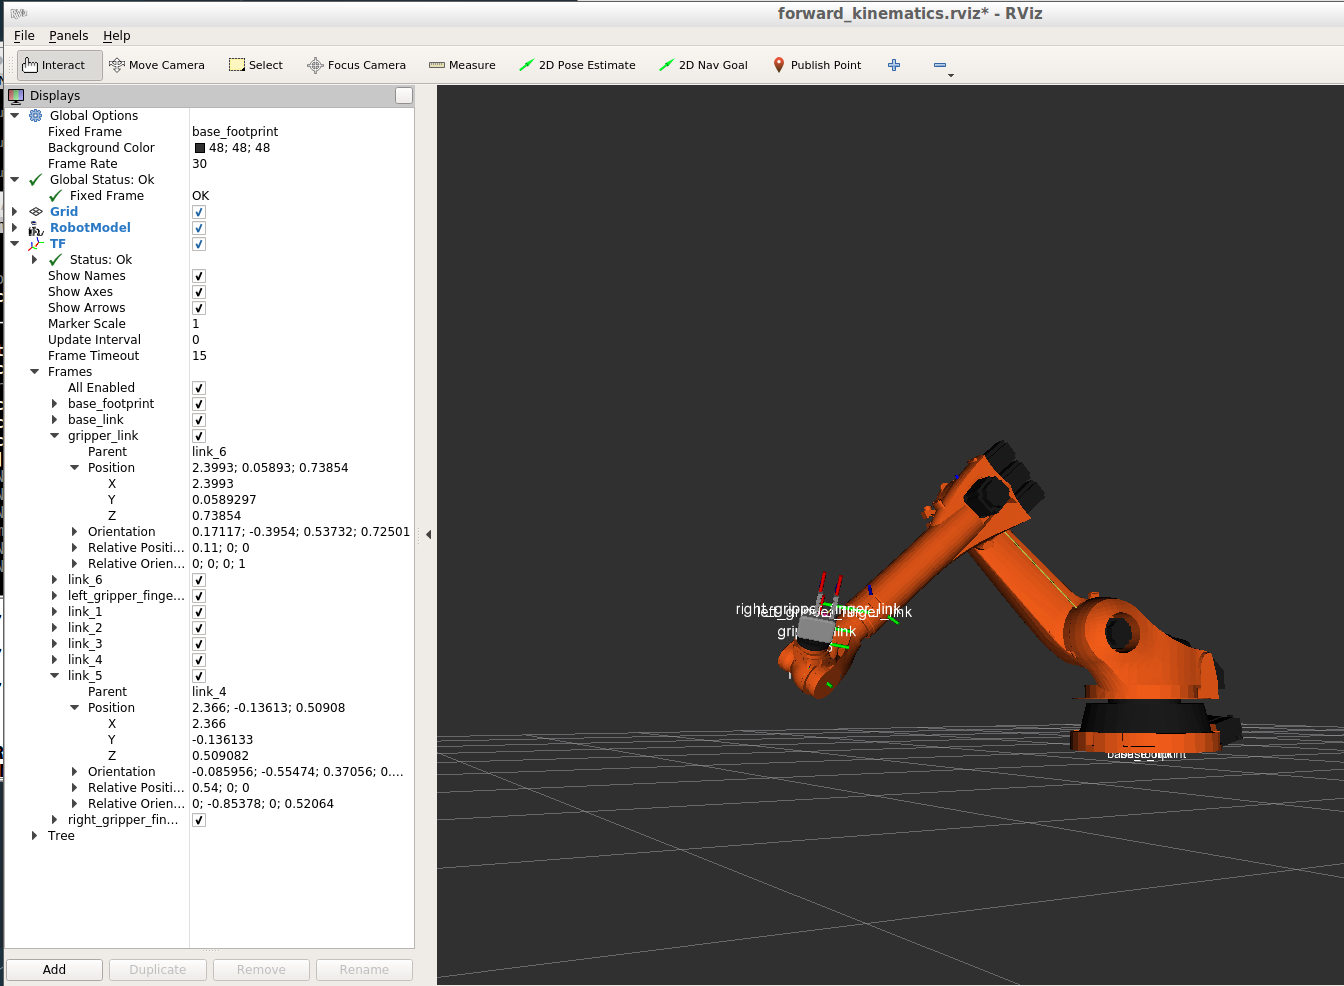

In [848]:
Image('pic/FK_pic.png')

In [849]:
gripper_quart_orien = [
    0.171174, -0.395395, 0.537323, 0.72015
]

# intrinsic rxyz rotation 
axes = 'ryzx'

# get back euler angles roll, pitch, yaw
(roll, pitch, yaw) = tf.transformations.euler_from_quaternion(
                gripper_quart_orien,axes=axes)
trans_mat_0_6 = tf.transformations.euler_matrix(roll,pitch,yaw,axes=axes)

In [850]:
trans_mat_0_6

array([[ 0.10359162, -0.91570663, -0.38826556,  0.        ],
       [ 0.64306452,  0.3594638 , -0.67620545,  0.        ],
       [ 0.75877322, -0.17963059,  0.62609588,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

We can see the transformation matrix is in the correct form just missing the position vector of the gripper link as the last collumn.

We need to correct the matrix to match the gripper frame

In [851]:
trans_mat_0_G = Matrix(trans_mat_0_6) * R_corr
trans_mat_0_G

Matrix([
[-0.388265559062013, 0.915706629713247, 0.103591621019599,   0],
[-0.676205445059498, -0.35946379595713, 0.643064518899914,   0],
[ 0.626095880611068, 0.179630586747627, 0.758773220789028,   0],
[                 0,                 0,                 0, 1.0]])

Compare with the Forward matrix and ignore the last column which is still needed to be calculated for the position of the WC. We can see they are close enough

In [852]:
T0_G_eval

Matrix([
[-0.391706823650805,  0.914054389751172, 0.105215668424479,   2.39621265081565],
[-0.672244307120706, -0.362392700664483, 0.645568836026728, 0.0535769417015897],
[ 0.628214418689351,  0.182143084089721, 0.756419553600438,  0.743432790332382],
[                 0,                  0,                 0,                1.0]])

Now we can calculate the WC position with respect to base frame using the given gripper position and the newly computed transformation matrices.

As the diagram below, we can calculate the WC position by applying vector math: 

$r_{0/4} + r_{4/ee} = r_{0/ee}$ (1)

Thus,

$r_{0/4} = r_{0/ee} - r_{4/ee} $ (2)


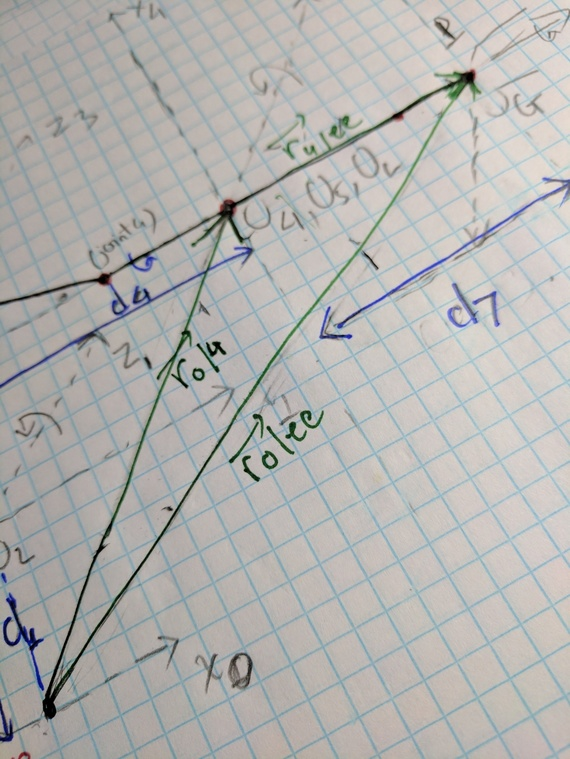

In [854]:
Image('pic/fk_vector.jpg')

Also, the third column of $ trans_mat_0_G $ matrices is the orthonormal vector $ g_n $ defined z axis of the EE relative to the base frame.

In [855]:
g_n = trans_mat_0_G[:-1, 2:3]

In [856]:
# position of the EE wrt to Base frame from a random position:
p = Matrix([ 2.3993, 0.0589297, 0.73854])

From equation (2), the magnitude of the translation along z axis of the EE is actually $ d7 $ due to our DH parameter defintion. So we can find WC as below:

In [857]:
WC = p - np.matrix(s[d7] * g_n)
WC

Matrix([
[  2.36791173883106],
[-0.135918849226674],
[ 0.508631714100925]])

We can see the WC coordinates are very close with the one from the Forward Kinematic picture below.

## 3. Inverse Kinematic Breakdown into Position and Orientation

### Positions 

#### Calculating q1

Based on the diagram below, we can see how the whole arm shematic looks like if we rotate joint 1 with an angle $ q1 $. We can also project WC onto the plane of $ x_0 $ and $ y_0 $ to find q1 using $ atan2 $ function

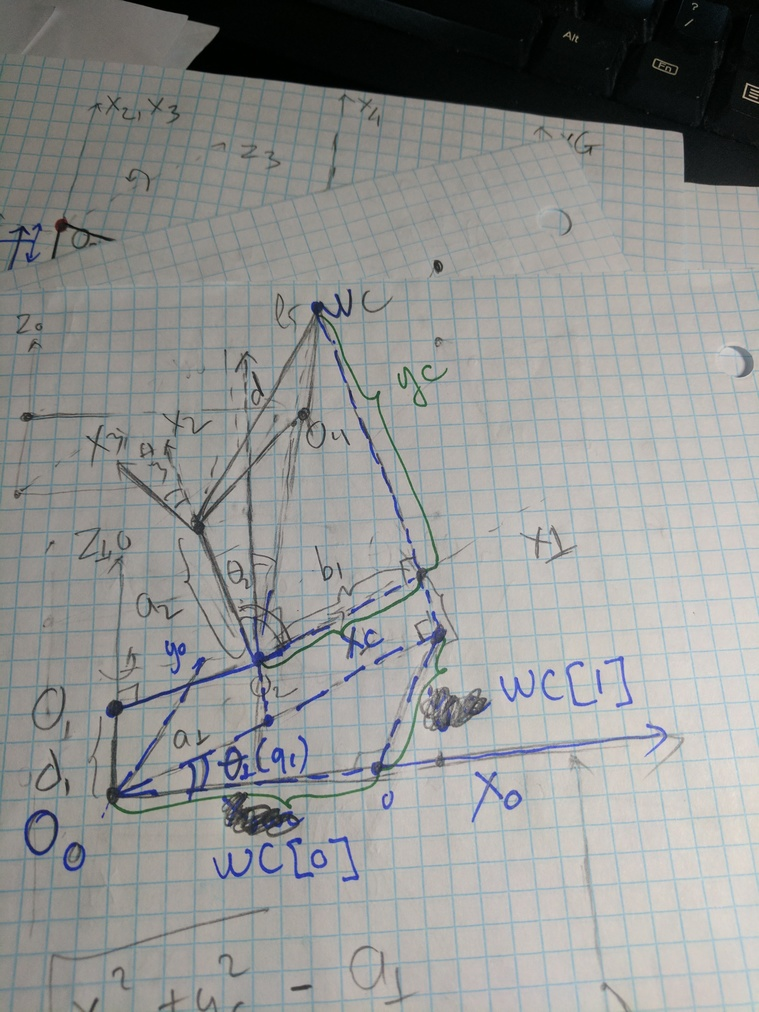

In [858]:
Image('pic/q1.jpg')

In [859]:
import math
# given thetas value from Forward Kinematic
new_pose

{q6: -5.59, q3: -0.12, q4: 5.46, q1: -0.06, q5: -2.05, q2: 0.86}

In [860]:
# theta1 and q1 are the same 
theta1 = math.atan2(WC[1], WC[0])
theta1

-0.057337385724694594

Other components of WC project into $ x1 $ can also be calculated:

In [861]:
xc = sqrt(WC[0]**2 + WC[1]**2) - s[a1]
yc = WC[2] - s[d1]
print "xc ", xc
print "yc ", yc

xc  2.02180942245979
yc  -0.241368285899075


#### Calculating q2

From definition, q2 (theta2) is the angle between $ x1 $ and $ x2 $ rotating around $ z2 $ axis. Below diagram show that we can calculate q2 using some trigonometry rules.

$ theta2 = theta21 + theta22 $

We can easily find theta21 using atan2
$ theta21 = atan2(yc, xc) $

Then we can apply cosine rule to find cosine of theta22

$ cos(theta22) = (l_{25} ^ 2 + a2^2 - l_{35}^2) / (2 * a2 * l_{25}) $



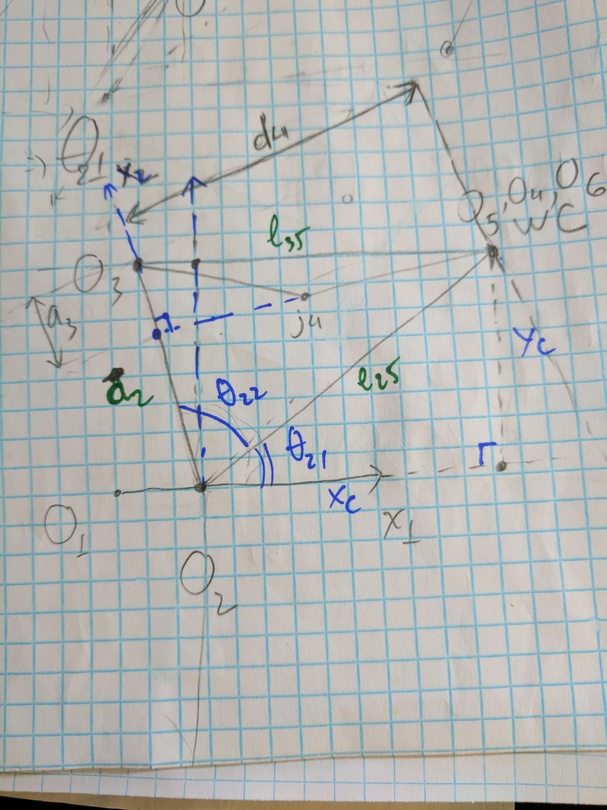

In [862]:
Image('pic/q2.jpg')

In [863]:
# calculate l35 and l25 based on given information
l35 = sqrt(s[a3]*s[a3] + s[d4]*s[d4])
l25 = sqrt(xc*xc + yc*yc)

# now calculate theta21 and theta22
theta21 = math.atan2(yc,xc)
cos_theta22 = ((l25 * l25) + (s[a2] * s[a2]) - (l35 * l35)) / (2 * s[a2] * l25)



# now calculate theta2
if (cos_theta22 >= 1):
    cos_theta22 = 1
theta22_pos = math.atan2(sqrt(1 - cos_theta22*cos_theta22),cos_theta22)
theta22_neg = math.atan2(-sqrt(1 -cos_theta22*cos_theta22),cos_theta22)
# from the forward kinematic the positive rotation is actually clockwise so 
# we have to flip theta2 here  
theta2 = ((theta22_pos + theta21) - np.pi/2) * (-1)
# if theta2 is not in the range of joint 2 then we can use the negative solution of sign
if not ( theta2 >= -0.79 and theta2 <= 1.48):
    print(" USE NEG. SINE THETA2 SOLUTION")
    theta2 = ((theta22_neg + theta21) - np.pi/2) * (-1)
print "theta21 ", theta21
print 'theta22_pos ', theta22_pos
print 'theta22_neg ', theta22_neg
print 'theta2 ', theta2


theta21  -0.118819963317
theta22_pos  0.824620320813
theta22_neg  -0.824620320813
theta2  0.864995969299


#### Calculate q3 (theta3)

From the digrams sketched below, we can split theta3 in two scenarios and determine which scenarios to apply based on the sign of the cosine of angle $theta_{32}$ which is between $l_{35}$ and $a2$


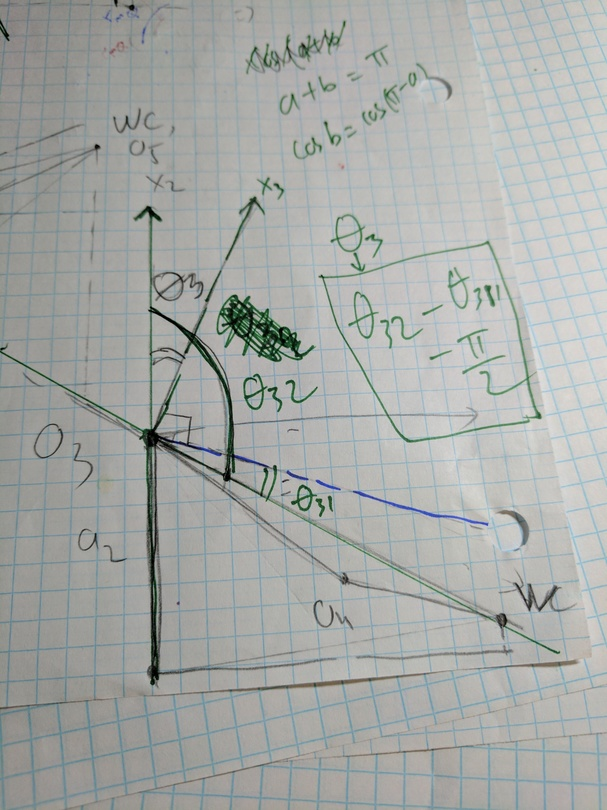

In [864]:
Image('pic/q3_1.jpg')

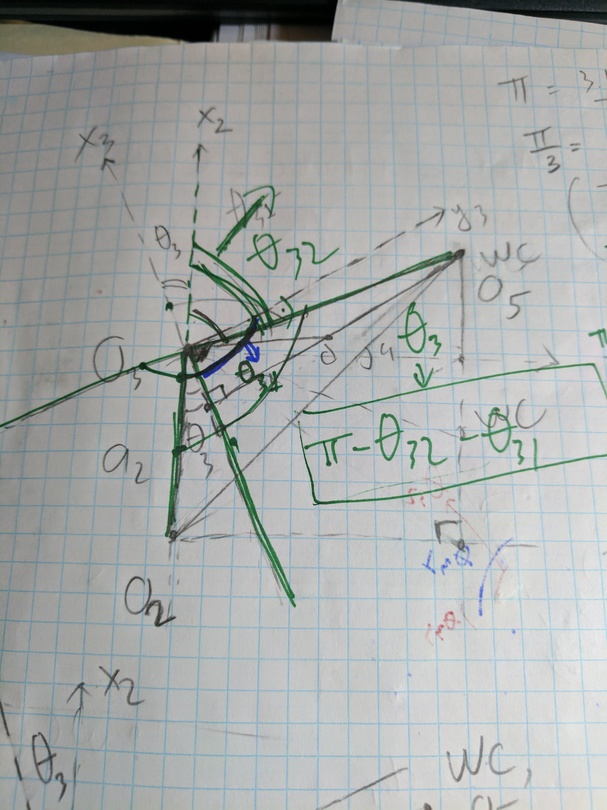

In [865]:
Image('pic/q3_2.jpg')

In [866]:
# cosine_theta32 = -cos (np.pi - theta_32)
cosine_theta32 = (l25*l25 - s[a2]*s[a2] - l35*l35) / (2 * s[a2] * l35)
print "cosine_theta32 ",cosine_theta32
# fix cosine to just in case we hit a special case that 
if (cosine_theta32 >= 1):
    cosine_theta32 = 1
#theta32 = math.acos(cosine_theta32)
if (cosine_theta32 <= 0):
    print("Cosine theta32 is NEGATIVE")
    theta31 = math.atan2(s[a3],s[d4])
    theta32_pos = math.atan2(sqrt(1 - cosine_theta32*cosine_theta32), cosine_theta32)
    theta32_neg = math.atan2(-sqrt(1 - cosine_theta32*cosine_theta32), cosine_theta32)
    theta3 = theta32_pos - theta31 - np.pi/2
    if not (theta3 >= -3.67 and theta3 < 1.13):
        print(" USE NEG. THETA3 SOLUTION")
        theta3 = theta32_neg - theta31 - np.pi/2
else: # theta32 is smaller than 90
    print("Cosine theta32 is POSITIVE")
    theta32_1 = math.atan2(sqrt(1 - cosine_theta32*cosine_theta32), cosine_theta32)
    theta32_2 = math.atan2(-sqrt(1 - cosine_theta32*cosine_theta32), cosine_theta32)
    if (theta32_1 <= np.pi/2):
        theta32 = theta32_1
    else:
        theta32 = theta32_2
    theta31 = math.atan2(s[d4],s[a3])
    theta3 = np.pi - theta32 - theta31
    theta3 = theta3 * (-1)
    # use the other solution if the current solution is not in range
    if not (theta3 >= -3.67 and theta3 < 1.13):
        theta3 = np.pi - theta32_2 - theta31 
        theta3 = theta3 * (-1)
        in_range = (theta3 >= -3.67 and theta3 < 1.13)
        print ("Alternative solution : ",theta3, " in range: ", in_range)

print "Theta 3: ", theta3
    

cosine_theta32  0.0880911994350609
Cosine theta32 is POSITIVE
Theta 3:  -0.0522210712116


##### Note: the result for q3 is not super accurate but close enough in my opinion.

### CALCULATE Q4, Q5, Q6 

Apply transformation angles to compute the the transformational matrix between joint3 and joint6. 

$ R36 = R30 * R06 $

$R30$ : rotation matrix from frame 3 to frame 0 

$R06$ : rotation matrix from base frame to gripper

We can find $ R06 $ using simple euler angles rotation matrix rule:

$ Rrpy = R_z * R_y * R_x $ 

$Rx$ : fundamental rotation around x-axis

$Ry$ : fundamental rotation around y-axis

$Rz$ : fundamental rotation around z-axis

$ Rrpy $ = $R$_$0$_$6$ : rotation matrix from base frame to gripper


In [867]:
 # define symbols for rotation
rx,ry,rz = symbols('rx,ry,rz')
Rrpy = Rot_z * Rot_y * Rot_x 

We can find $ R30 $ by applying the inverse matrix rule:

In [868]:
R30 = T0_3.inv()[:3,:3]

We can now combine these results to find R36

In [869]:
R36 = simplify(R30 * Rrpy)
R36 = R36.subs({q1:theta1,q2:theta2,q3:theta3, rx:yaw, ry:pitch, rz: roll})
R36

Matrix([
[-0.335416757434792,   0.878520579179412, -0.340142897603642],
[  0.56798613442782, -0.0994700011449664, -0.817005183563704],
[-0.751589881471053,  -0.467233679041325, -0.465623602537324]])

Finally, we just use tf library to help find euler angle which match theta4, theta5, theta6 as needed. 

In [870]:
theta4, theta5, theta6 = tf.transformations.euler_from_matrix(np.matrix(R36),axes='ryzx')
# avoid collision between gripper and joint 4 
theta5 = np.clip(theta5 - np.pi/2, -2.08,2.18)
theta6 = theta6 - np.pi/2

print("theta 1", theta1)
print("theta 2", theta2)
print("theta 3", theta3)
print("theta 4", theta4)
print("theta 5", theta5)
print("theta 6", theta6)

('theta 1', -0.057337385724694594)
('theta 2', 0.8649959692992166)
('theta 3', -0.05222107121159847)
('theta 4', 1.9905493163940307)
('theta 5', -0.966739411338286)
('theta 6', 0.1211532667062043)


After quite some experiments, adding clip to theta5 to avoid some collision between link 4 and link 6. Also, the angle of theta5 and theta6 are not quite matched the expected for a lot of experiments so adding pi/2 seems like make the inverse move from object location to drop off location behaves in the correct manner. 

This is not a complete solution for the problem as there are still some hacky codes. However, this solution is stable enough across different object positions so I chose to stick with it. I am working on some missing cases for q2,q3 that can cause the arm go awkward. 